generated chromosomes: [[700, 596, 415], [259, 516, 371], [338, 591, 211], [259, 474, 216], [159, 435, 252], [259, 155, 53], [579, 558, 413], [181, 516, 128], [126, 550, 298], [143, 435, 116]]
best chromosomes: (array([77.27599612, 23.29051514]), array([77.2766175, 23.2831064]), array([77.2731175, 23.2916064]))


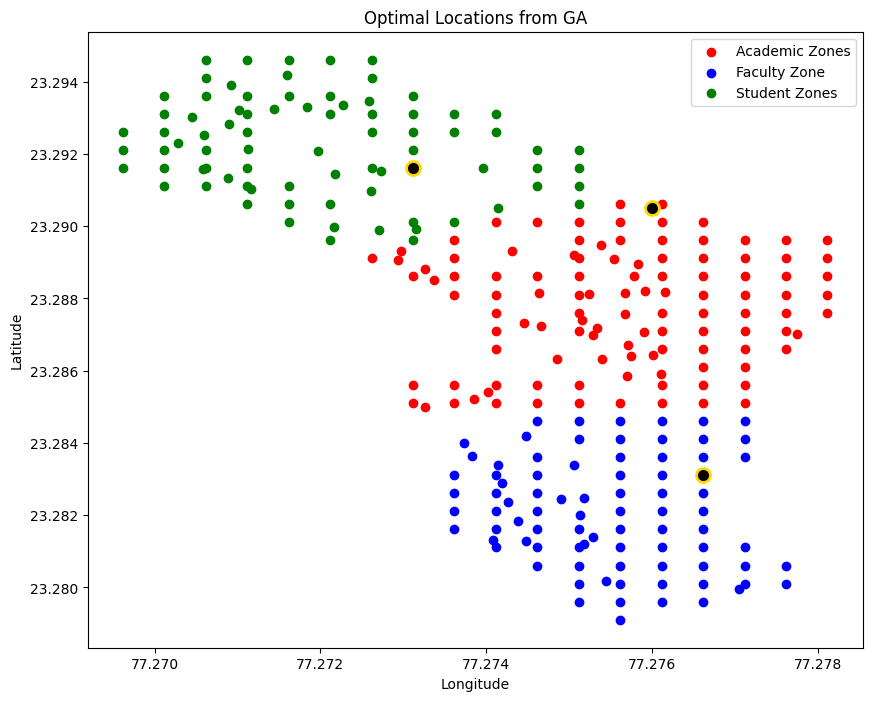

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Load CSV files

#zone files
academic_zones_df = pd.read_csv('academic.csv')
faculty_zone_df = pd.read_csv('faculty.csv')
student_zones_df = pd.read_csv('student.csv')

#dist files
academic_dist = pd.read_csv('academic_dist.csv')
faculty_dist = pd.read_csv('faculty_dist.csv')
student_dist = pd.read_csv('student_dist.csv')

distance_matrices = [academic_dist, faculty_dist, student_dist]


# Define a function to generate chromosomes
def generate_chromosome(academic_df, faculty_df, student_df):
    academic_gene = academic_df.sample(1)['proj_id'].values[0]
    faculty_gene = faculty_df.sample(1)['proj_id'].values[0]
    student_gene = student_df.sample(1)['proj_id'].values[0]
    return [academic_gene, faculty_gene, student_gene]

# Generate initial population of chromosomes
num_chromosomes = 10
chromosomes = [generate_chromosome(academic_zones_df, faculty_zone_df, student_zones_df) for _ in range(num_chromosomes)]
print("generated chromosomes:", chromosomes)

def calculate_cost_sum(proj_id, dist_file):
    # Read the CSV file into a DataFrame
    dist_df = dist_file
    
    # Filter rows where 'origin_id' matches 'proj_id' and calculate the sum of 'total_cost'
    total_cost_sum = dist_df.loc[dist_df['origin_id'] == proj_id, 'total_cost'].sum()
    
    return total_cost_sum

# Placeholder for fitness_function (to be defined based on distance matrices)
def fitness_function(chromosome, distance_matrices):
    cost = 0
    for i in range(3):
        cost += calculate_cost_sum(chromosome[i], distance_matrices[i])
    return cost


# Sort chromosomes based on fitness
fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in chromosomes]
sorted_chromosomes = [x for _, x in sorted(zip(fitness_scores, chromosomes), key=lambda pair: pair[0])]

# Define crossover function
def crossover(chromosome1, chromosome2):
    new_chromosome1 = [chromosome1[0]] + chromosome2[1:]
    new_chromosome2 = [chromosome2[0]] + chromosome1[1:]
    return new_chromosome1, new_chromosome2

# Perform crossover
new_generation = []
for i in range(len(sorted_chromosomes) - 1):
    offspring1, offspring2 = crossover(sorted_chromosomes[i], sorted_chromosomes[i+1])
    new_generation.extend([offspring1, offspring2])

# Define mutation function
def mutate(chromosome, academic_df, faculty_df, student_df):
    gene_to_mutate = random.randint(0, len(chromosome) - 1)
    if gene_to_mutate == 0:
        new_gene = academic_df.sample(1)['proj_id'].values[0]
    elif gene_to_mutate == 1:
        new_gene = faculty_df.sample(1)['proj_id'].values[0]
    else:
        new_gene = student_df.sample(1)['proj_id'].values[0]
    mutated_chromosome = list(chromosome)
    mutated_chromosome[gene_to_mutate] = new_gene
    return mutated_chromosome

# Perform mutation
mutated_generation = [mutate(chromosome, academic_zones_df, faculty_zone_df, student_zones_df) for chromosome in new_generation]

# Evaluate and sort mutated generation
mutated_generation_fitness_scores = [fitness_function(chromosome, distance_matrices) for chromosome in mutated_generation]
sorted_mutated_generation = [x for _, x in sorted(zip(mutated_generation_fitness_scores, mutated_generation), key=lambda pair: pair[0])]

# Best chromosome after mutation
best_chromosome_after_mutation = sorted_mutated_generation[0]

# Function to get coordinates from chromosome
def get_coordinates_from_chromosome(chromosome, academic_df, faculty_df, student_df):
    academic_gene_id, faculty_gene_id, student_gene_id = chromosome
    academic_coordinates = academic_df.loc[academic_df['proj_id'] == academic_gene_id, ['x', 'y']].values[0]
    faculty_coordinates = faculty_df.loc[faculty_df['proj_id'] == faculty_gene_id, ['x', 'y']].values[0]
    student_coordinates = student_df.loc[student_df['proj_id'] == student_gene_id, ['x', 'y']].values[0]
    return academic_coordinates, faculty_coordinates, student_coordinates

# Extract coordinates for the best chromosome
best_chromosome_coordinates = get_coordinates_from_chromosome(best_chromosome_after_mutation, academic_zones_df, faculty_zone_df, student_zones_df)

print("best chromosomes:", best_chromosome_coordinates)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')
for i, coordinates in enumerate(best_chromosome_coordinates):
    plt.scatter(coordinates[0], coordinates[1], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Locations from GA')
plt.show()

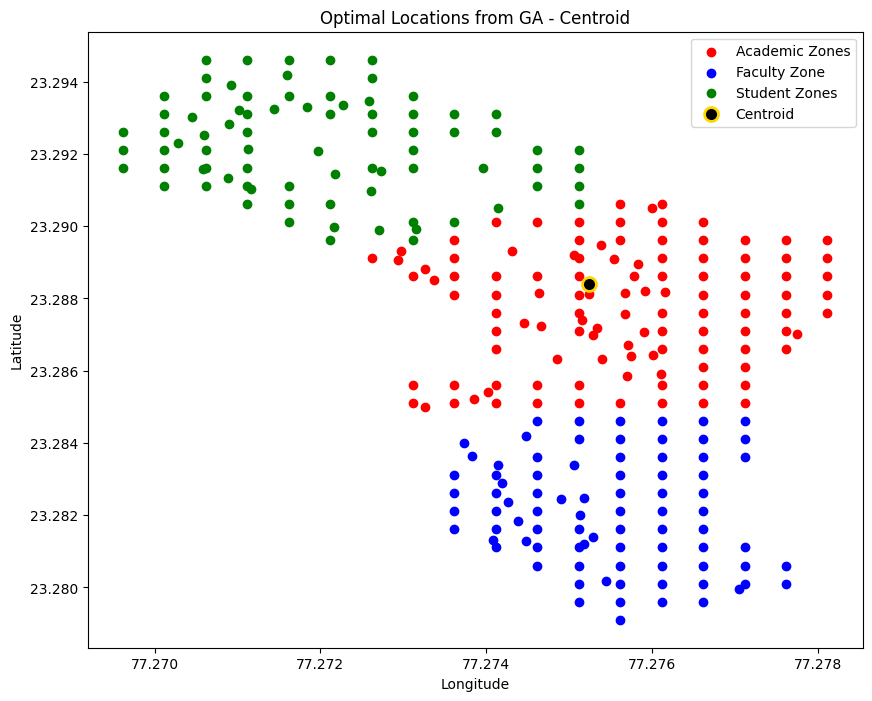

In [2]:
import numpy as np
from scipy.spatial import Delaunay

# Extract coordinates from best_chromosome_coordinates
coordinates = np.array(best_chromosome_coordinates)

# Perform Delaunay triangulation
tri = Delaunay(coordinates)

# Find the centroid of the triangulated points
centroid = np.mean(coordinates[tri.simplices], axis=1)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')
plt.scatter(centroid[:, 0], centroid[:, 1], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5, label='Centroid')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimal Locations from GA - Centroid')
plt.show()


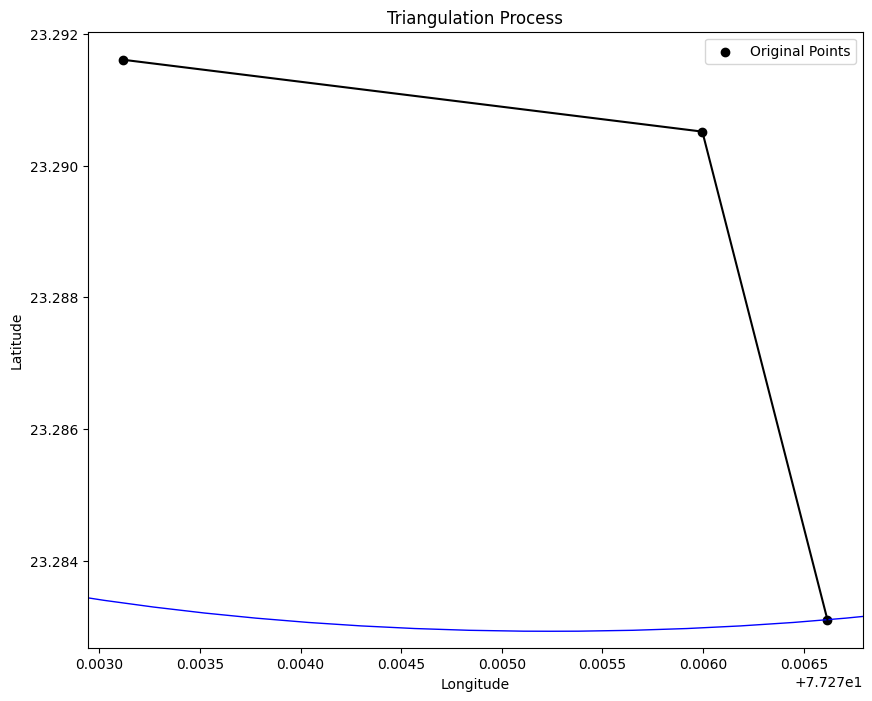

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Extract coordinates from best_chromosome_coordinates
coordinates = np.array(best_chromosome_coordinates)

# Plotting the original points
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='black', label='Original Points')

# Perform Delaunay triangulation
tri = Delaunay(coordinates)

# Plotting the triangulation edges
for simplex in tri.simplices:
    plt.plot(coordinates[simplex, 0], coordinates[simplex, 1], 'k-')

# Plotting the circumcircles of each triangle (optional)
for simplex in tri.simplices:
    xc = np.mean(coordinates[simplex, 0])
    yc = np.mean(coordinates[simplex, 1])
    r = np.max(np.linalg.norm(coordinates[simplex, :] - [xc, yc], axis=1))
    circle = plt.Circle((xc, yc), r, color='b', fill=False)
    plt.gca().add_artist(circle)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulation Process')
plt.legend()
plt.show()


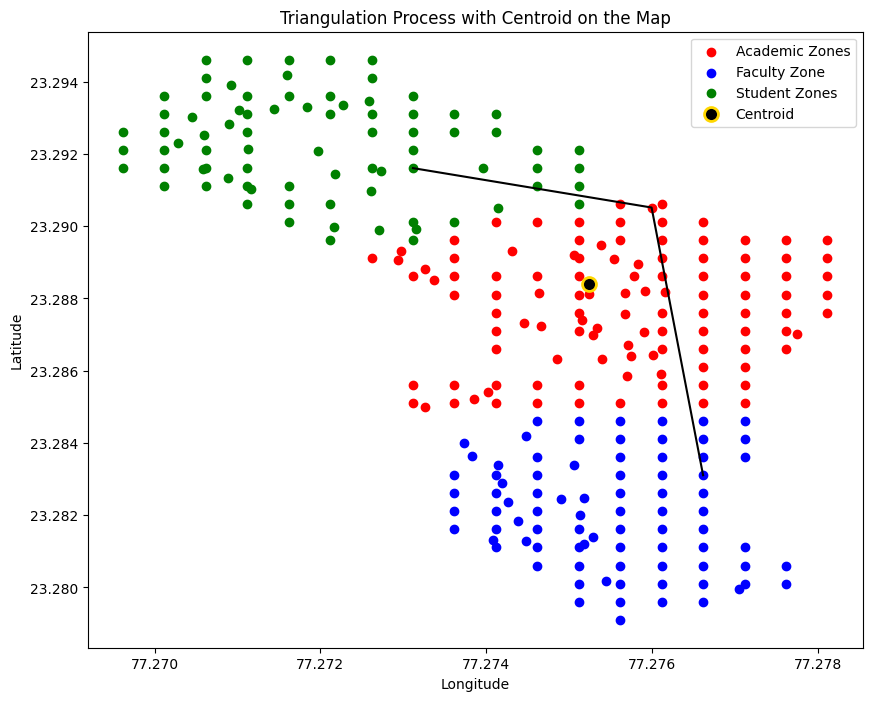

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Extract coordinates from best_chromosome_coordinates
coordinates = np.array(best_chromosome_coordinates)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(academic_zones_df['x'], academic_zones_df['y'], color='red', label='Academic Zones')
plt.scatter(faculty_zone_df['x'], faculty_zone_df['y'], color='blue', label='Faculty Zone')
plt.scatter(student_zones_df['x'], student_zones_df['y'], color='green', label='Student Zones')

# Perform Delaunay triangulation
tri = Delaunay(coordinates)

# Plotting the triangulation edges
for simplex in tri.simplices:
    plt.plot(coordinates[simplex, 0], coordinates[simplex, 1], 'k-')

# Find the centroid of the triangulated points
centroid = np.mean(coordinates[tri.simplices], axis=1)

# Plotting the centroid
plt.scatter(centroid[:, 0], centroid[:, 1], color='black', s=100, edgecolor='gold', linewidth=2, zorder=5, label='Centroid')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulation Process with Centroid on the Map')
plt.legend()
plt.show()


In [11]:
import folium

# Create a map centered at a specific location (you can adjust the coordinates and zoom level)
map_center = [np.mean(academic_zones_df['y']), np.mean(academic_zones_df['x'])]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for academic zones with a legend
for index, row in academic_zones_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='red')).add_to(mymap)
    
# Add markers for faculty zones with a legend
for index, row in faculty_zone_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='blue')).add_to(mymap)
    
# Add markers for student zones with a legend
for index, row in student_zones_df.iterrows():
    folium.Marker([row['y'], row['x']], popup=row['proj_id'], icon=folium.Icon(color='green')).add_to(mymap)

# Add marker for centroid with a legend
centroid_location = [np.mean(centroid[:, 1]), np.mean(centroid[:, 0])]  # Coordinates need to be in [lat, lon] format
folium.Marker(centroid_location, popup='Optimum Location (Centroid)', icon=folium.Icon(color='black')).add_to(mymap)

# Add legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 165px; height: 165px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; Academic Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Faculty Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; Student Zone &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; Optimum Location &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i>
      </div>
     '''
mymap.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
mymap.save("locations_map_with_legend.html")
